In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for professional charts
sns.set_style("whitegrid")
pd.set_option('display.max_columns', None)

# LOAD DATA
# Note: We parse dates immediately to save work later
try:
    df = pd.read_csv('../data/raw/data.csv', parse_dates=['TransactionStartTime'])
    print("Data loaded successfully.")
except FileNotFoundError:
    print("Error: File not found. Please check the filename in data/raw/")

# Preview
df.head()

Data loaded successfully.


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15 02:18:49+00:00,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15 02:19:08+00:00,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15 02:44:21+00:00,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15 03:32:55+00:00,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15 03:34:21+00:00,2,0


In [3]:
# 1. Structure Check
print(f"Shape: {df.shape}")
print("\n--- Data Types ---")
print(df.info())

# 2. Missing Value Check
print("\n--- Missing Values ---")
print(df.isnull().sum())

# 3. Categorical vs Numerical Split
categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(include=['number']).columns

print(f"\nCategorical Columns: {list(categorical_cols)}")
print(f"Numerical Columns: {list(numerical_cols)}")

Shape: (95662, 16)

--- Data Types ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   TransactionId         95662 non-null  object             
 1   BatchId               95662 non-null  object             
 2   AccountId             95662 non-null  object             
 3   SubscriptionId        95662 non-null  object             
 4   CustomerId            95662 non-null  object             
 5   CurrencyCode          95662 non-null  object             
 6   CountryCode           95662 non-null  int64              
 7   ProviderId            95662 non-null  object             
 8   ProductId             95662 non-null  object             
 9   ProductCategory       95662 non-null  object             
 10  ChannelId             95662 non-null  object             
 11  Amount                95662 

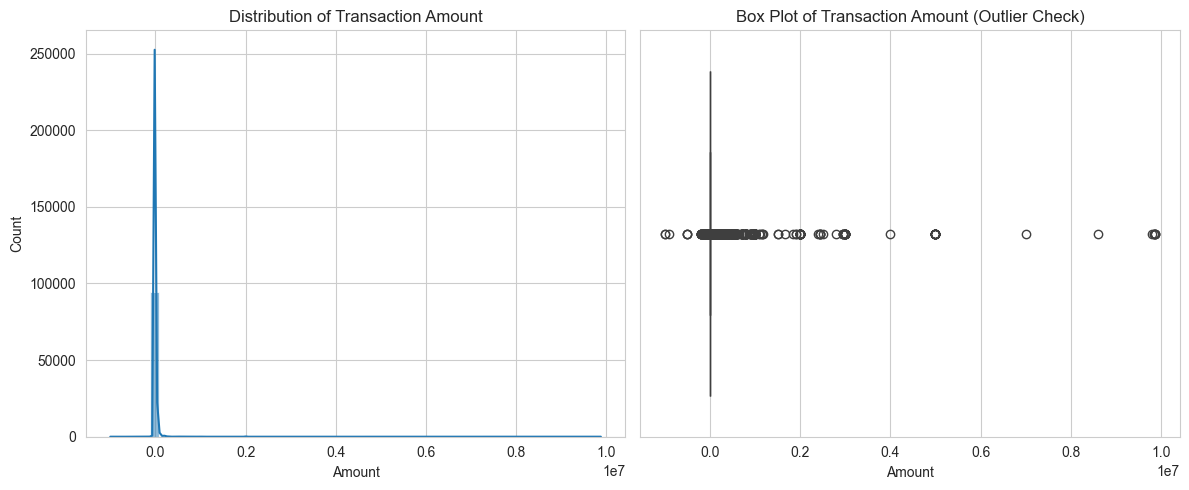

Description of Amount:
count    9.566200e+04
mean     6.717846e+03
std      1.233068e+05
min     -1.000000e+06
25%     -5.000000e+01
50%      1.000000e+03
75%      2.800000e+03
max      9.880000e+06
Name: Amount, dtype: float64


In [20]:
# Distribution of Transaction Amount
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['Amount'], bins=50, kde=True)
plt.title('Distribution of Transaction Amount')
plt.savefig('../reports/figures/Distribution of Transaction Amount.png', dpi=300, bbox_inches='tight')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['Amount'])
plt.title('Box Plot of Transaction Amount (Outlier Check)')

plt.tight_layout()
plt.savefig('../reports/figures/Box Plot of Transaction Amount.png', dpi=300, bbox_inches='tight')

plt.show()

# Insight Check:
# Are there negative amounts? (Refunds/returns?)
# Are there massive outliers? (Whales or fraud?)
print("Description of Amount:")
print(df['Amount'].describe())

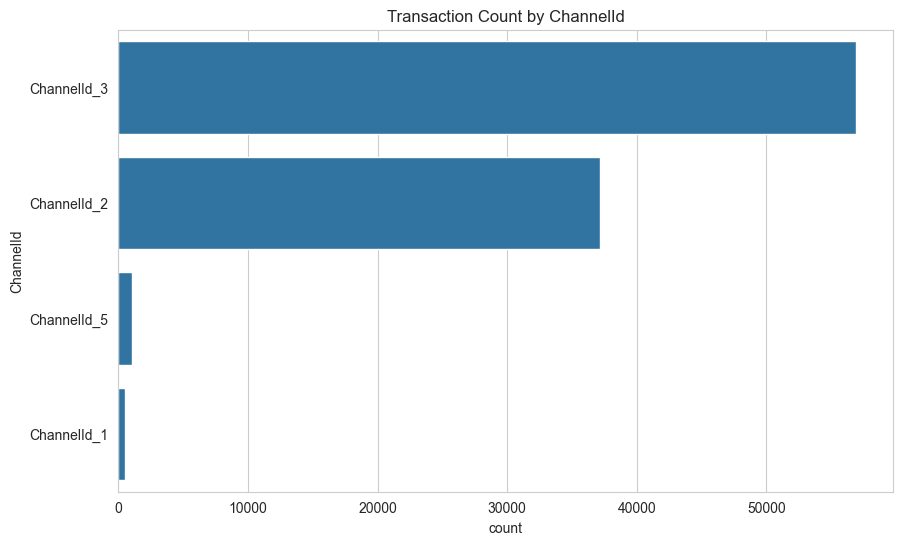

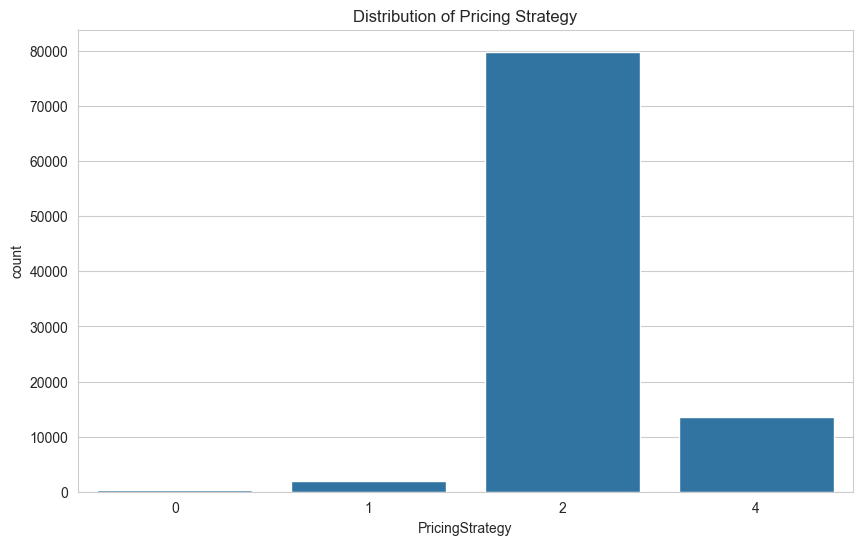

In [21]:
# Visualizing Channels
plt.figure(figsize=(10, 6))
sns.countplot(y='ChannelId', data=df, order=df['ChannelId'].value_counts().index)
plt.title('Transaction Count by ChannelId')
plt.savefig('../reports/figures/Transaction Count by ChannelId.png', dpi=300, bbox_inches='tight')

plt.show()

# Visualizing Pricing Strategy
plt.figure(figsize=(10, 6))
sns.countplot(x='PricingStrategy', data=df)
plt.title('Distribution of Pricing Strategy')
plt.savefig('../reports/figures/Distribution of Pricing Strategy.png', dpi=300, bbox_inches='tight')

plt.show()

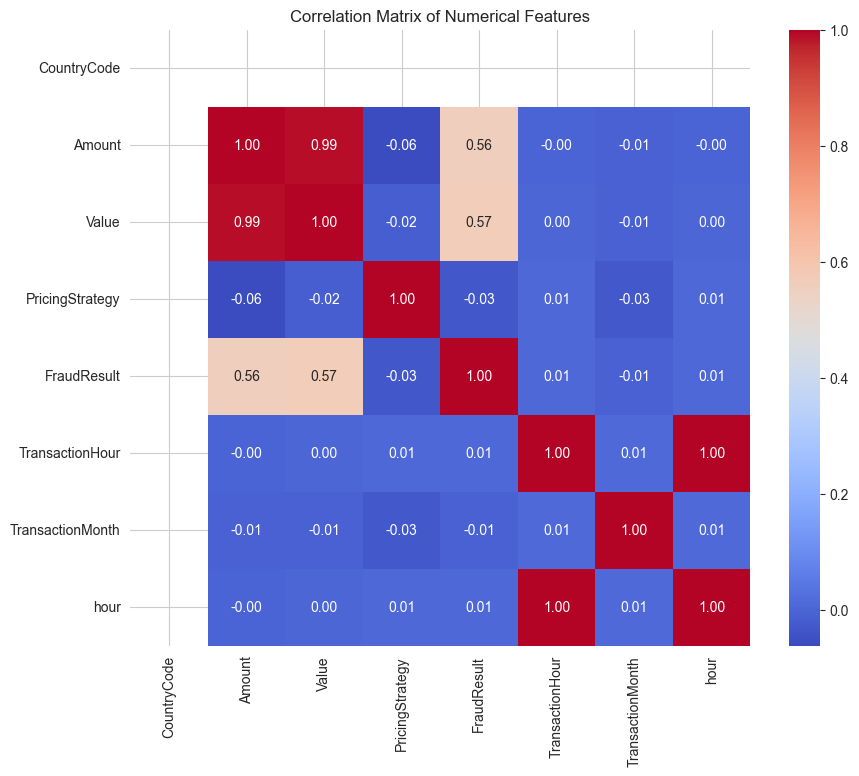

In [22]:
# Correlation Matrix
plt.figure(figsize=(10, 8))
corr_matrix = df.select_dtypes(include=['number']).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')

plt.savefig('../reports/figures/Correlation Matrix of Numerical Features.png', dpi=300, bbox_inches='tight')

plt.show()

/var/folders/vp/jp6dyn2x6v7dvrtdk8mn938r0000gn/T/ipykernel_17083/1179462762.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='ProductCategory', data=df, order=order, palette='viridis')


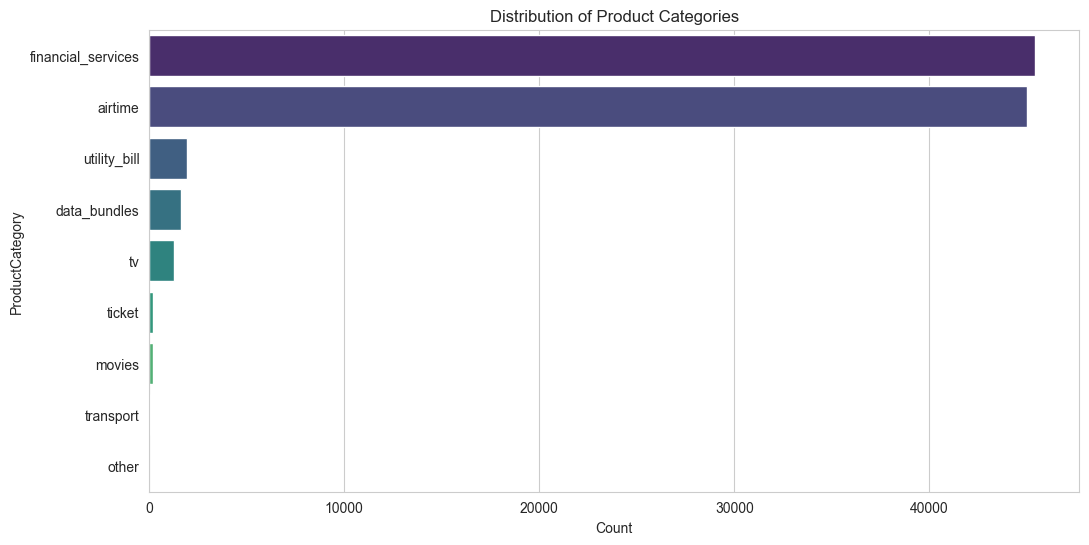

/var/folders/vp/jp6dyn2x6v7dvrtdk8mn938r0000gn/T/ipykernel_17083/1179462762.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='ProductId', data=df, order=top_products, palette='magma')


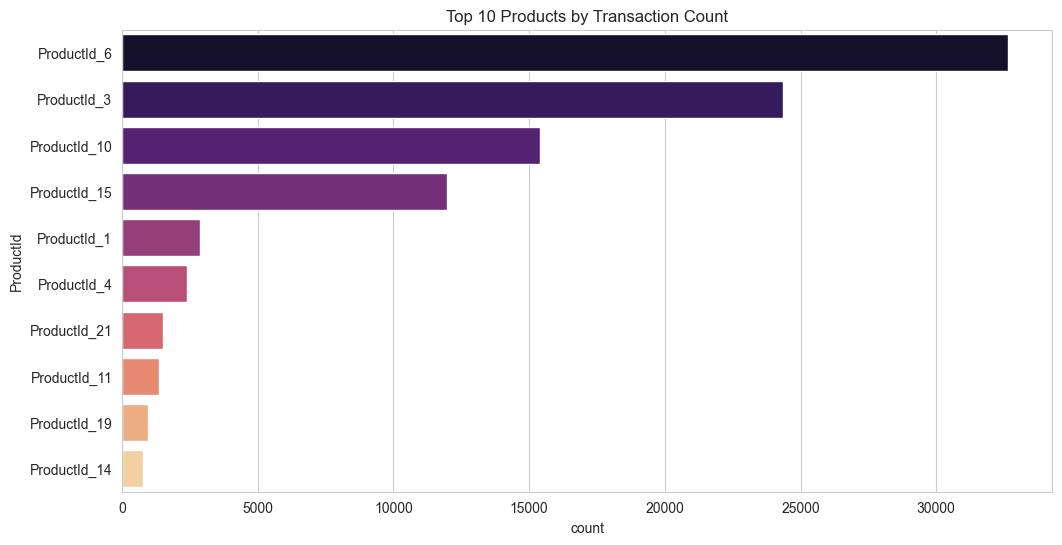

In [23]:
# 1. Product Category Distribution
plt.figure(figsize=(12, 6))
order = df['ProductCategory'].value_counts().index
sns.countplot(y='ProductCategory', data=df, order=order, palette='viridis')
plt.title('Distribution of Product Categories')
plt.xlabel('Count')

plt.savefig('../reports/figures/Distribution of Product Categories.png', dpi=300, bbox_inches='tight')

plt.show()

# 2. Top 10 Specific Products
plt.figure(figsize=(12, 6))
top_products = df['ProductId'].value_counts().head(10).index
sns.countplot(y='ProductId', data=df, order=top_products, palette='magma')
plt.title('Top 10 Products by Transaction Count')

plt.savefig('../reports/figures/Top 10 Products by Transaction Count.png', dpi=300, bbox_inches='tight')

plt.show()

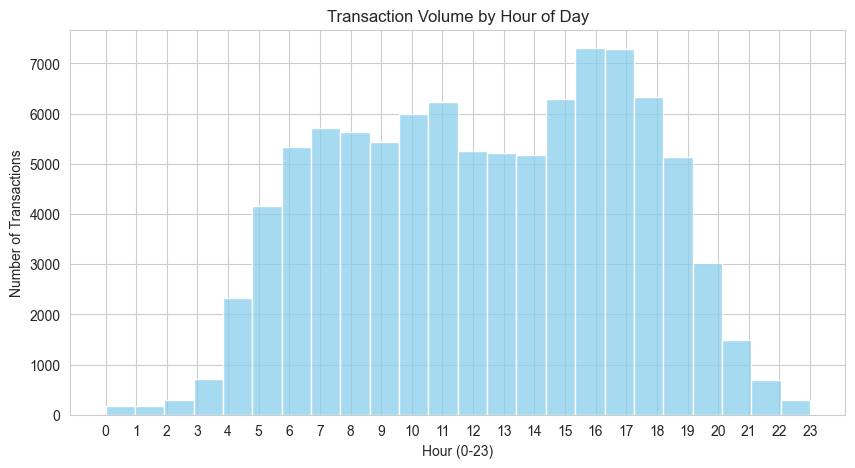

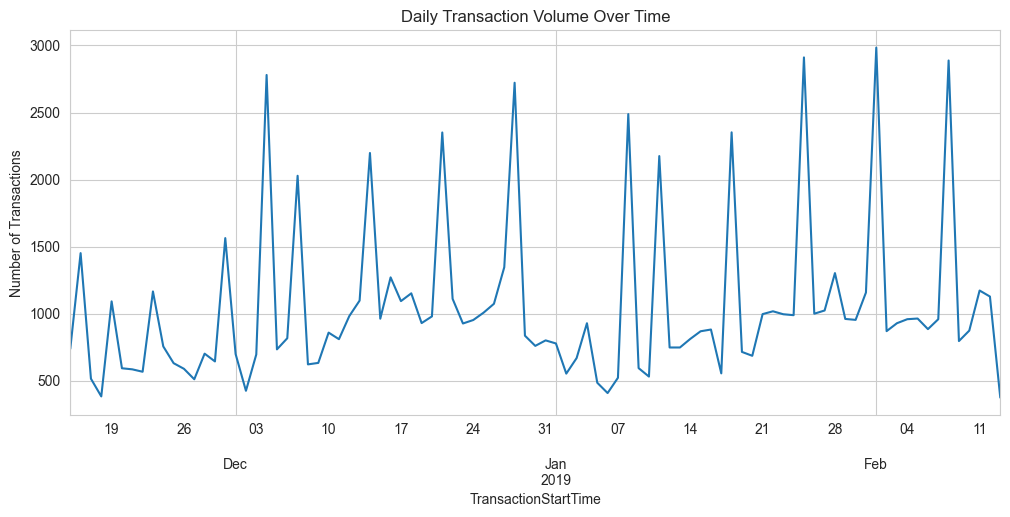

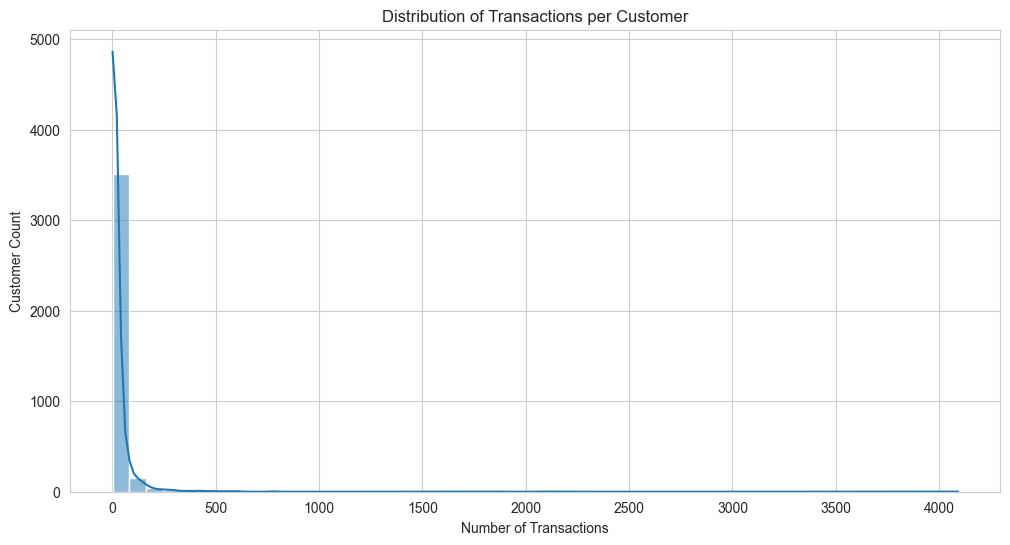


Transactions per Customer Summary:
count    3742.000000
mean       25.564404
std        96.929602
min         1.000000
25%         2.000000
50%         7.000000
75%        20.000000
max      4091.000000
dtype: float64

Unique Customers: 3742


In [24]:
# Extract time features
df['TransactionHour'] = df['TransactionStartTime'].dt.hour
df['TransactionDay'] = df['TransactionStartTime'].dt.day_name()
df['TransactionMonth'] = df['TransactionStartTime'].dt.month

# 1. Transactions by Hour
plt.figure(figsize=(10, 5))
sns.histplot(df['TransactionHour'], bins=24, kde=False, color='skyblue')
plt.title('Transaction Volume by Hour of Day')
plt.xlabel('Hour (0-23)')
plt.ylabel('Number of Transactions')
plt.xticks(range(0, 24))

plt.savefig('../reports/figures/Transaction Volume by Hour of Day.png', dpi=300, bbox_inches='tight')

plt.show()

# 2. Daily Transaction Trend (Time Series)
daily_counts = df.set_index('TransactionStartTime').resample('D').size()
plt.figure(figsize=(12, 5))
daily_counts.plot()
plt.title('Daily Transaction Volume Over Time')
plt.ylabel('Number of Transactions')
plt.show()


# Transactions per Customer
txn_per_customer = df.groupby('CustomerId').size()

plt.figure(figsize=(12,6))
sns.histplot(txn_per_customer, bins=50, kde=True)
plt.title('Distribution of Transactions per Customer')
plt.xlabel('Number of Transactions')
plt.ylabel('Customer Count')

plt.savefig('../reports/figures/Distribution of Total Transaction per Customer.png', dpi=300, bbox_inches='tight')

plt.show()

print("\nTransactions per Customer Summary:")
print(txn_per_customer.describe())

print(f"\nUnique Customers: {df['CustomerId'].nunique()}")


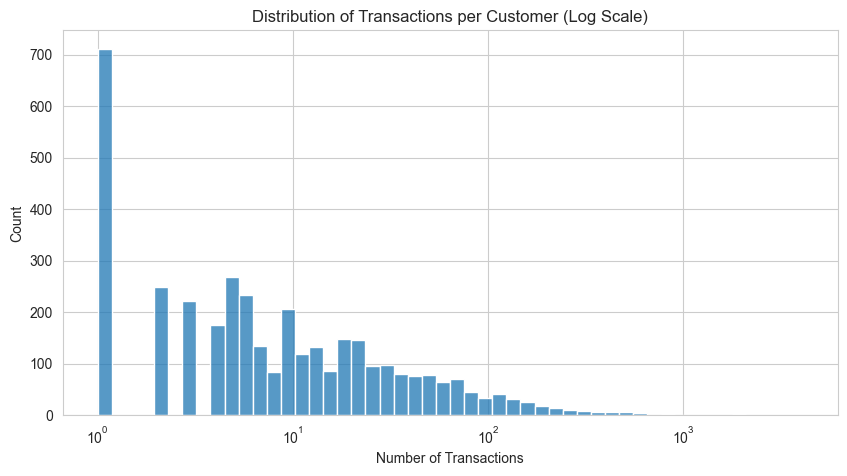

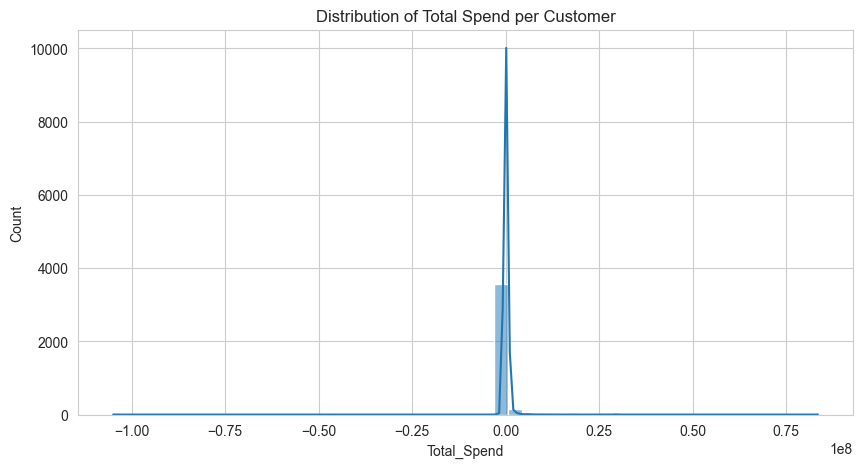

Customer Stats Summary:
          Tx_Count   Total_Spend     Avg_Spend     Std_Spend  Fraud_Count
count  3742.000000  3.742000e+03  3.742000e+03  3.030000e+03  3742.000000
mean     25.564404  1.717377e+05  1.571562e+04  1.680216e+04     0.051577
std      96.929602  2.717305e+06  1.676991e+05  1.074311e+05     0.774328
min       1.000000 -1.049000e+08 -4.250000e+05  0.000000e+00     0.000000
25%       2.000000  4.077438e+03  1.000000e+03  1.533574e+03     0.000000
50%       7.000000  2.000000e+04  2.583846e+03  5.389779e+03     0.000000
75%      20.000000  7.996775e+04  4.877614e+03  7.549050e+03     0.000000
max    4091.000000  8.345124e+07  8.601821e+06  3.309916e+06    31.000000


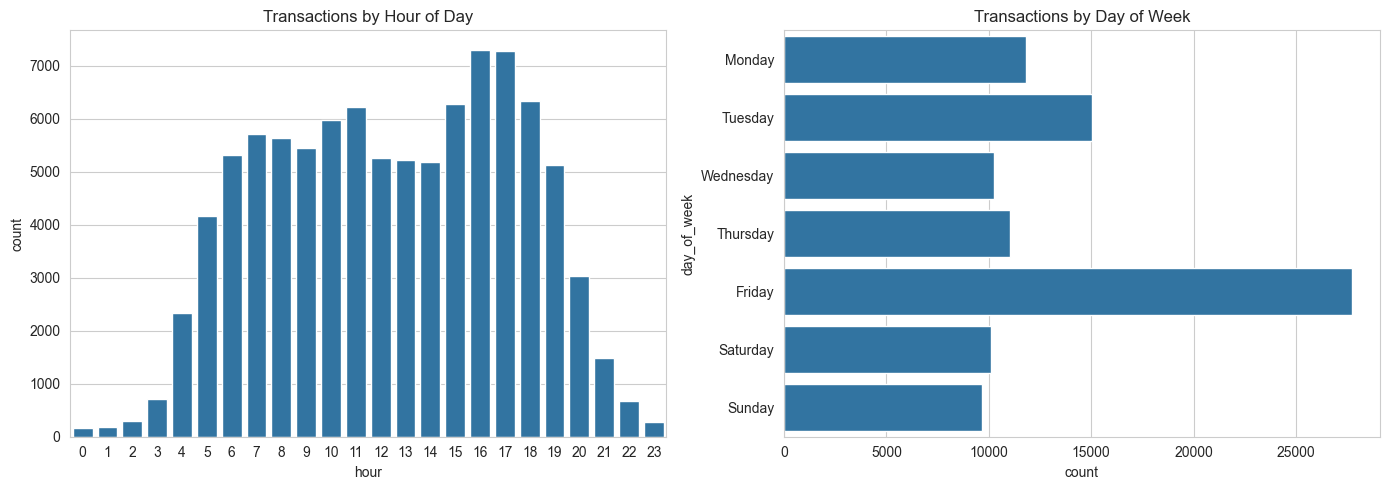

In [25]:
# Group by CustomerId to get user-level stats
customer_stats = df.groupby('CustomerId').agg({
    'TransactionId': 'count',
    'Amount': ['sum', 'mean', 'std'],
    'FraudResult': 'sum'
}).reset_index()

# Flatten columns
customer_stats.columns = ['CustomerId', 'Tx_Count', 'Total_Spend', 'Avg_Spend', 'Std_Spend', 'Fraud_Count']

# 1. Transactions per Customer (Frequency)
plt.figure(figsize=(10, 5))
sns.histplot(customer_stats['Tx_Count'], bins=50, log_scale=True) # Log scale because of power law
plt.title('Distribution of Transactions per Customer (Log Scale)')
plt.xlabel('Number of Transactions')

plt.savefig('../reports/figures/Distribution of Transactions per Custome.png', dpi=300, bbox_inches='tight')

plt.show()

# 2. Total Spend per Customer (Monetary)
plt.figure(figsize=(10, 5))
sns.histplot(customer_stats['Total_Spend'], bins=50, kde=True)
plt.title('Distribution of Total Spend per Customer')

plt.savefig('../reports/figures/Distribution of Total Spend per Customer.png', dpi=300, bbox_inches='tight')
plt.show()

print("Customer Stats Summary:")
print(customer_stats.describe())

#cell8
# Extract hour and day of week for temporal insights
df['hour'] = df['TransactionStartTime'].dt.hour
df['day_of_week'] = df['TransactionStartTime'].dt.day_name()

plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
sns.countplot(x='hour', data=df)
plt.title('Transactions by Hour of Day')

plt.savefig('../reports/figures/Transactions by Hour of Day.png', dpi=300, bbox_inches='tight')

plt.subplot(1,2,2)
sns.countplot(y='day_of_week', data=df, order=[
    'Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'
])
plt.title('Transactions by Day of Week')

plt.tight_layout()
plt.savefig('../reports/figures/Transactions by Day of Week.png', dpi=300, bbox_inches='tight')
plt.show()


Debit Transactions (Spends): 57473
Credit Transactions (Income/Refunds): 38189


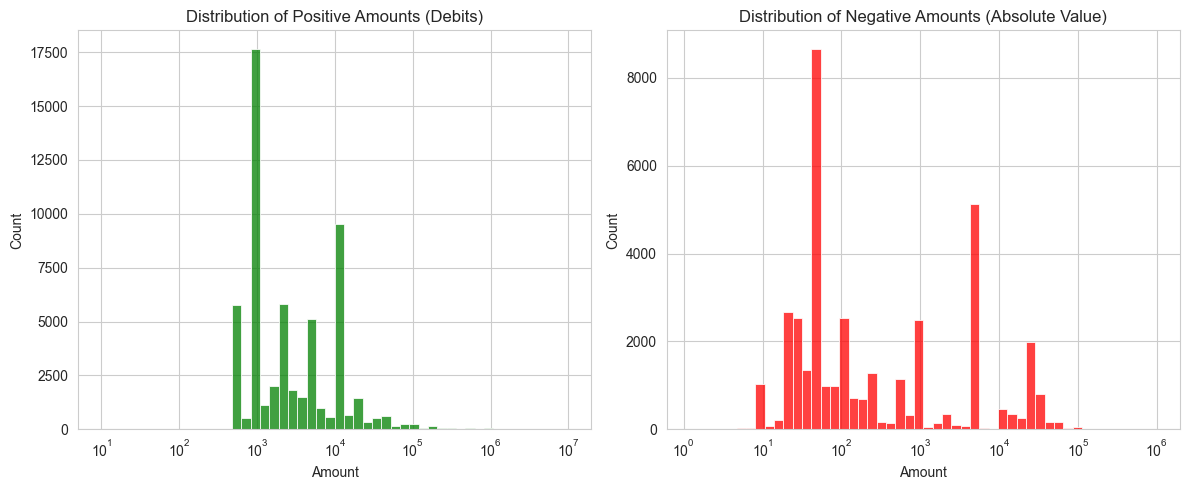

In [26]:
# Split into Debits (Positive) and Credits/Refunds (Negative)
debits = df[df['Amount'] > 0]
credits = df[df['Amount'] < 0]

print(f"Debit Transactions (Spends): {debits.shape[0]}")
print(f"Credit Transactions (Income/Refunds): {credits.shape[0]}")

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(debits['Amount'], bins=50, log_scale=True, color='green')
plt.title('Distribution of Positive Amounts (Debits)')
plt.savefig('../reports/figures/Distribution of positive Amounts.png', dpi=300, bbox_inches='tight')
plt.subplot(1, 2, 2)
sns.histplot(credits['Amount'].abs(), bins=50, log_scale=True, color='red')
plt.title('Distribution of Negative Amounts (Absolute Value)')
plt.tight_layout()
plt.savefig('../reports/figures/Distribution of Negative Amounts.png', dpi=300, bbox_inches='tight')
plt.show()

In [18]:
#cell10
print("\n--- Key EDA Insights Summary ---")

print(f"1. Total customers: {df['CustomerId'].nunique()}")
print(f"2. Average transactions per customer: {df.groupby('CustomerId').size().mean():.2f}")

top_cat = df['ProductCategory'].value_counts().idxmax()
print(f"3. Most common product category: {top_cat}")

neg_pct = df['Amount'].lt(0).mean() * 100
print(f"4. Negative transactions (refunds/adjustments): {neg_pct:.2f}%")

most_active_hour = df['hour'].mode()[0]
print(f"5. Peak transaction hour: {most_active_hour}:00")



--- Key EDA Insights Summary ---
1. Total customers: 3742
2. Average transactions per customer: 25.56
3. Most common product category: financial_services
4. Negative transactions (refunds/adjustments): 39.92%
5. Peak transaction hour: 16:00
